<a href="https://colab.research.google.com/github/ElisabethShah/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/LS_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install us

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
from scipy.stats import ttest_ind
import re
import us

In [0]:
plotly.tools.set_credentials_file(username='elisabethdawn', api_key='UdLMj8B6qByw1MXxyCnM')

In [0]:
congress = pd.read_csv('https://raw.githubusercontent.com/ElisabethShah/'
                       'DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/'
                       'data/PersonalWealth2013', 
                       header=0,
                       usecols=[0, 1, 2, 3, 4, 5],
                       names=['name', 'chamber', 'party', 'min_net_worth', 
                              'avg_net_worth', 'max_net_worth'])

In [5]:
congress.head()

,name,chamber,party,min_net_worth,avg_net_worth,max_net_worth
0,Darrell Issa (R-Calif),H,R,"$292,250,034","$448,425,019","$604,600,004"
1,Mark Warner (D-Va),S,D,"$95,134,301","$254,168,650","$413,203,000"
2,John K. Delaney (D-Md),H,D,"$109,038,155","$222,410,577","$335,782,999"
3,Jared Polis (D-Colo),H,D,"$70,227,432","$213,224,214","$356,220,997"
4,Dave Trott (R-Mich),H,R,"$89,945,456","$200,509,228","$311,073,000"


In [6]:
congress.tail()

,name,chamber,party,min_net_worth,avg_net_worth,max_net_worth
528,Ruben Hinojosa (D-Texas),H,D,"-$5,045,927","-$1,865,466","$1,314,995"
529,Jeff Fortenberry (R-Neb),H,R,"-$4,445,993","-$2,042,997","$359,998"
530,Emanuel Cleaver (D-Mo),H,D,"-$4,637,988","-$2,291,495","$54,998"
531,Alcee L. Hastings (D-Fla),H,D,"-$7,348,999","-$4,732,002","-$2,115,006"
532,David Valadao (R-Calif),H,R,"-$23,998,997","-$11,592,002","$814,993"


In [7]:
congress.describe(include='all')

,name,chamber,party,min_net_worth,avg_net_worth,max_net_worth
count,533,533,533,533,533,533
unique,533,2,3,514,515,500
top,Kevin McCarthy (R-Calif),H,R,$0,$0,$0
freq,1,433,299,6,6,6


In [0]:
removepunc = str.maketrans({'$': None, ',': None})

In [0]:
congress['min_net_worth'] = congress['min_net_worth'].str.translate(removepunc)
congress['avg_net_worth'] = congress['avg_net_worth'].str.translate(removepunc)
congress['max_net_worth'] = congress['max_net_worth'].str.translate(removepunc)

congress['min_net_worth'] = congress['min_net_worth'].astype(float)
congress['avg_net_worth'] = congress['avg_net_worth'].astype(float)
congress['max_net_worth'] = congress['max_net_worth'].astype(float)

In [10]:
congress.describe(include='all')

,name,chamber,party,min_net_worth,avg_net_worth,max_net_worth
count,533,533,533,5.330000e+02,5.330000e+02,5.330000e+02
unique,533,2,3,NaN,NaN,NaN
top,Kevin McCarthy (R-Calif),H,R,NaN,NaN,NaN
freq,1,433,299,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.343219e+06,8.069579e+06,1.279594e+07
std,NaN,NaN,NaN,1.686426e+07,3.061713e+07,4.617892e+07
min,NaN,NaN,NaN,-3.753489e+07,-1.159200e+07,-2.115006e+06
25%,NaN,NaN,NaN,6.901000e+04,3.075080e+05,5.250000e+05
50%,NaN,NaN,NaN,4.370200e+05,1.029505e+06,1.634992e+06
75%,NaN,NaN,NaN,1.748037e+06,3.808003e+06,6.105000e+06


In [0]:
congress['state_abbr'] = congress['name'].str.extract('-([^\s]+?)\)')

In [12]:
congress.describe(include='all')

,name,chamber,party,min_net_worth,avg_net_worth,max_net_worth,state_abbr
count,533,533,533,5.330000e+02,5.330000e+02,5.330000e+02,533
unique,533,2,3,NaN,NaN,NaN,50
top,Kevin McCarthy (R-Calif),H,R,NaN,NaN,NaN,Calif
freq,1,433,299,NaN,NaN,NaN,54
mean,NaN,NaN,NaN,3.343219e+06,8.069579e+06,1.279594e+07,NaN
std,NaN,NaN,NaN,1.686426e+07,3.061713e+07,4.617892e+07,NaN
min,NaN,NaN,NaN,-3.753489e+07,-1.159200e+07,-2.115006e+06,NaN
25%,NaN,NaN,NaN,6.901000e+04,3.075080e+05,5.250000e+05,NaN
50%,NaN,NaN,NaN,4.370200e+05,1.029505e+06,1.634992e+06,NaN
75%,NaN,NaN,NaN,1.748037e+06,3.808003e+06,6.105000e+06,NaN


In [13]:
congress['state_abbr'].unique()

array(['Calif', 'Va', 'Md', 'Colo', 'Mich', 'Texas', 'Conn', 'Fla',
       'Wash', 'NY', 'Tenn', 'Idaho', 'Ohio', 'NJ', 'Mass', 'Maine', 'ND',
       'Wis', 'Ariz', 'Ga', 'Ky', 'La', 'Mo', 'NM', 'Mont', 'NC', 'Ill',
       'Pa', 'SD', 'Wyo', 'Iowa', 'Ala', 'WVa', 'Del', 'Ore', 'Okla',
       'RI', 'Ind', 'Vt', 'SC', 'Minn', 'Ark', 'Nev', 'Utah', 'NH', 'Neb',
       'Miss', 'Kan', 'Hawaii', 'Alaska'], dtype=object)

In [0]:
states = pd.read_html('https://raw.githubusercontent.com/ElisabethShah/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/data/StateTable.html')[0]

In [15]:
states.head()

,State,Traditionalabbreviation,Otherabbreviations
0,Alabama,Ala.,NaN
1,Alaska,Alaska,NaN
2,Arizona,Ariz.,NaN
3,Arkansas,Ark.,NaN
4,California,Calif.,Cal.


In [0]:
states.columns = ['state', 'trad_abbr', 'other_abbr']

In [0]:
deletechars = str.maketrans({'.': None, ' ': None})

In [0]:
states['no_punc'] = states['trad_abbr'].str.translate(deletechars)

In [19]:
states['no_punc'].unique()

array(['Ala', 'Alaska', 'Ariz', 'Ark', 'Calif', 'Colo', 'Conn', 'Del',
       'DC', 'Fla', 'Ga', 'Hawaii', 'Idaho', 'Ill', 'Ind', 'Iowa', 'Kans',
       'Ky', 'La', 'Maine', 'Md', 'Mass', 'Mich', 'Minn', 'Miss', 'Mo',
       'Mont', 'Nebr', 'Nev', 'NH', 'NJ', 'NMex', 'NY', 'NC', 'NDak',
       'Ohio', 'Okla', 'Oreg', 'Pa', 'RI', 'SC', 'SDak', 'Tenn', 'Tex',
       'Utah', 'Vt', 'Va', 'Wash', 'WVa', 'Wis', 'Wyo'], dtype=object)

In [0]:
congress = congress.merge(states[['state', 'no_punc']], 
                          left_on='state_abbr', right_on='no_punc',
                          how='left')

congress = congress.drop(columns=['no_punc'])

In [21]:
congress[congress['state'].isnull()]['state_abbr'].unique()

array(['Texas', 'ND', 'NM', 'SD', 'Ore', 'Neb', 'Kan'], dtype=object)

In [0]:
def state_name(text):
  state = us.states.lookup(text)
  if state:
    return state.name
  else:
    return np.NaN

congress.loc[congress['state'].isnull(), 'state'] = congress['state_abbr'].apply(state_name)

In [23]:
congress[congress['state'].isnull()]['state_abbr'].unique()

array(['Ore', 'Neb', 'Kan'], dtype=object)

In [0]:
state_lookup = {'Ore': 'Oregon', 
                'Neb': 'Nebraska', 
                'Kan': 'Kansas'}

In [0]:
for state_abbr in state_lookup:
  congress.loc[congress['state_abbr']==state_abbr, 'state'] = state_lookup[state_abbr]

In [26]:
congress.describe(include='all')

,name,chamber,party,min_net_worth,avg_net_worth,max_net_worth,state_abbr,state
count,533,533,533,5.330000e+02,5.330000e+02,5.330000e+02,533,533
unique,533,2,3,NaN,NaN,NaN,50,50
top,Kevin McCarthy (R-Calif),H,R,NaN,NaN,NaN,Calif,California
freq,1,433,299,NaN,NaN,NaN,54,54
mean,NaN,NaN,NaN,3.343219e+06,8.069579e+06,1.279594e+07,NaN,NaN
std,NaN,NaN,NaN,1.686426e+07,3.061713e+07,4.617892e+07,NaN,NaN
min,NaN,NaN,NaN,-3.753489e+07,-1.159200e+07,-2.115006e+06,NaN,NaN
25%,NaN,NaN,NaN,6.901000e+04,3.075080e+05,5.250000e+05,NaN,NaN
50%,NaN,NaN,NaN,4.370200e+05,1.029505e+06,1.634992e+06,NaN,NaN
75%,NaN,NaN,NaN,1.748037e+06,3.808003e+06,6.105000e+06,NaN,NaN


In [0]:
congress['state_abbr'] = congress['state'].replace(us.states.mapping('name', 'abbr'))

In [0]:
house = congress[congress['chamber']=='H']
senate = congress[congress['chamber']=='S']

In [29]:
house.describe(include='all')

,name,chamber,party,min_net_worth,avg_net_worth,max_net_worth,state_abbr,state
count,433,433,433,4.330000e+02,4.330000e+02,4.330000e+02,433,433
unique,433,1,2,NaN,NaN,NaN,50,50
top,Kevin McCarthy (R-Calif),H,R,NaN,NaN,NaN,CA,California
freq,1,433,245,NaN,NaN,NaN,52,52
mean,NaN,NaN,NaN,2.990854e+06,7.501081e+06,1.201131e+07,NaN,NaN
std,NaN,NaN,NaN,1.758249e+07,3.094218e+07,4.622990e+07,NaN,NaN
min,NaN,NaN,NaN,-3.753489e+07,-1.159200e+07,-2.115006e+06,NaN,NaN
25%,NaN,NaN,NaN,3.700400e+04,2.635190e+05,4.959980e+05,NaN,NaN
50%,NaN,NaN,NaN,3.030220e+05,8.435070e+05,1.395000e+06,NaN,NaN
75%,NaN,NaN,NaN,1.421020e+06,3.111020e+06,5.140000e+06,NaN,NaN


In [30]:
senate.describe(include='all')

,name,chamber,party,min_net_worth,avg_net_worth,max_net_worth,state_abbr,state
count,100,100,100,1.000000e+02,1.000000e+02,1.000000e+02,100,100
unique,100,1,3,NaN,NaN,NaN,50,50
top,James M. Inhofe (R-Okla),S,R,NaN,NaN,NaN,MD,Michigan
freq,1,100,54,NaN,NaN,NaN,2,2
mean,NaN,NaN,NaN,4.868958e+06,1.053117e+07,1.619339e+07,NaN,NaN
std,NaN,NaN,NaN,1.328241e+07,2.918950e+07,4.603393e+07,NaN,NaN
min,NaN,NaN,NaN,-4.368992e+06,3.250000e+04,5.000000e+04,NaN,NaN
25%,NaN,NaN,NaN,3.250162e+05,6.966465e+05,1.103250e+06,NaN,NaN
50%,NaN,NaN,NaN,1.216018e+06,2.794518e+06,4.116000e+06,NaN,NaN
75%,NaN,NaN,NaN,3.611299e+06,6.734801e+06,9.616250e+06,NaN,NaN


In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

df['text'] = df['state'] + '<br>' + \
    'Beef ' + df['beef'] + ' Dairy ' + df['dairy'] + '<br>' + \
    'Fruits ' + df['total fruits'] + ' Veggies ' + df['total veggies'] + '<br>' + \
    'Wheat ' + df['wheat'] + ' Corn ' + df['corn']

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = df['code'],
    z = df['total exports'].astype(float),
    locationmode = 'USA-states',
    text = df['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Millions USD")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = '2011 US Agriculture Exports by State<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~elisabethdawn/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [32]:
senate.head()

,name,chamber,party,min_net_worth,avg_net_worth,max_net_worth,state_abbr,state
1,Mark Warner (D-Va),S,D,95134301.0,254168650.0,413203000.0,VA,Virginia
7,Richard Blumenthal (D-Conn),S,D,79915815.0,99581170.0,119246525.0,CT,Connecticut
11,Dianne Feinstein (D-Calif),S,D,42023117.0,77235068.0,112447020.0,CA,California
14,Bob Corker (R-Tenn),S,R,19118035.0,54419017.0,89720000.0,TN,Tennessee
15,James E. Risch (R-Idaho),S,R,19188056.0,53630527.0,88072998.0,ID,Idaho


In [0]:
senate = senate.sort_values('state').reset_index(drop=True)

In [34]:
np.corrcoef(x=senate['avg_net_worth'][senate.index % 2 == 0], y=senate['avg_net_worth'][senate.index % 2 != 0])

array([[ 1.        , -0.03349647],
       [-0.03349647,  1.        ]])

In [35]:
ttest_ind(senate['avg_net_worth'][senate['party']=='R'], senate['avg_net_worth'][senate['party']=='D'], equal_var=False)

Ttest_indResult(statistic=-0.6308698990205475, pvalue=0.5309860769235722)

In [36]:
ttest_ind(house['avg_net_worth'][house['party']=='R'], house['avg_net_worth'][house['party']=='D'], equal_var=False)

Ttest_indResult(statistic=0.3447048800868635, pvalue=0.7304844462816487)

In [37]:
ttest_ind(congress['avg_net_worth'][congress['party']=='R'], congress['avg_net_worth'][congress['party']=='D'], equal_var=False)

Ttest_indResult(statistic=0.007712266798422995, pvalue=0.9938495696346045)

In [38]:
ttest_ind(house['avg_net_worth'], senate['avg_net_worth'], equal_var=False)

Ttest_indResult(statistic=-0.924969839138727, pvalue=0.35642253609825425)

In [39]:
house['avg_net_worth'].median()

843507.0

In [40]:
senate['avg_net_worth'].median()

2794518.0

In [41]:
congress['avg_net_worth'][congress['party']=='R'].median()

1107017.0

In [42]:
congress['avg_net_worth'][congress['party']=='D'].median()

946511.0

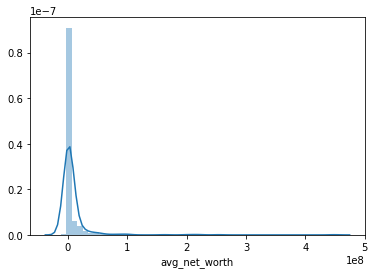

In [43]:
sns.distplot(congress['avg_net_worth']);

In [0]:
max_net_by_state = congress[['state', 'state_abbr', 'max_net_worth']].groupby(by='state').max()

In [45]:
scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

max_net_by_state['text'] = max_net_by_state['state_abbr'].replace(us.states.mapping('abbr', 'name'))

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = max_net_by_state['state_abbr'],
    z = max_net_by_state['max_net_worth'].astype(float),
    locationmode = 'USA-states',
    text = max_net_by_state['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Millions USD")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Maximum Estimated Net Worth of Any Legislator From State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~elisabethdawn/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'
